Order Data:
   Order ID Customer ID Product ID  Quantity Order Status  Order Date
0      1001        C001       P001       2.0    Delivered  2024-01-10
1      1002        C002       P002       3.0      Pending  2024-02-05
2      1003        C003       P003       NaN    Delivered  2024-03-12
3      1004        C001       P004       4.0    Cancelled  2024-01-15
4      1005        C004       P002       5.0    Delivered  2024-02-20
5      1006        C005       P005       1.0    Delivered  2024-01-11
6      1007        C006       P003       NaN    Delivered  2024-02-13
7      1008        C007       P006       3.0      Pending  2024-03-05
8      1009        C008       P002       7.0    Delivered  2024-04-08
9      1010        C009       P007       5.0    Cancelled  2024-05-01
Customer Data:
  Customer ID     Name    Country   Age   Join Date
0        C001    Alice        USA  30.0  2023-01-10
1        C002      Bob         UK  45.0  2023-05-12
2        C003  Charlie     Canada   NaN  2023-0

C:\Users\saith\AppData\Local\Temp\ipykernel_23608\1696121264.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Quantity'].fillna(df1['Quantity'].median(),inplace=True)
C:\Users\saith\AppData\Local\Temp\ipykernel_23608\1696121264.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

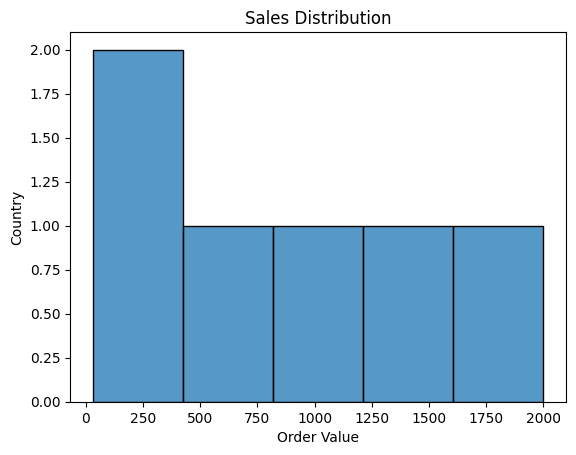

Line Chart:
Order Date
2024-01-10    1600.0
2024-01-11    2000.0
2024-02-05     300.0
2024-02-13      30.0
2024-02-20       0.0
2024-03-05    1050.0
2024-03-12     525.0
2024-04-08       0.0
Name: Order Value, dtype: float64


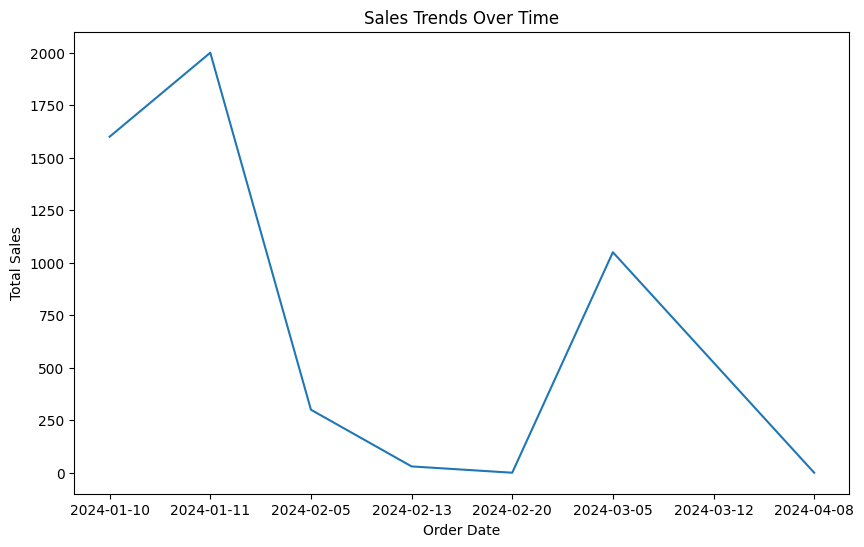

Correlation Matrix:
                Quantity  Price Per Unit  Order Value
Quantity        1.000000       -0.538414    -0.919210
Price Per Unit -0.538414        1.000000     0.657456
Order Value    -0.919210        0.657456     1.000000


Heatmap:


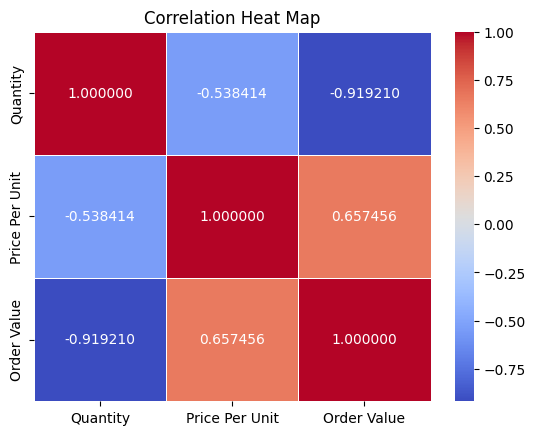

Pie chart:


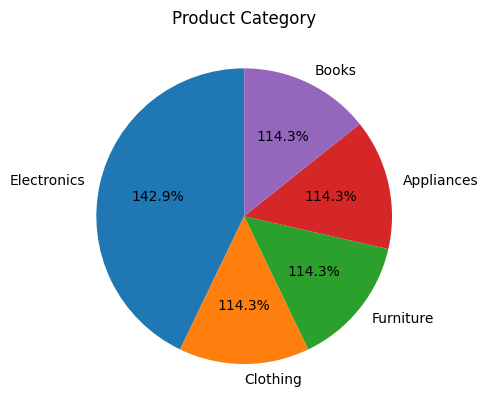

Visualization of Horizontal Bar Graph:


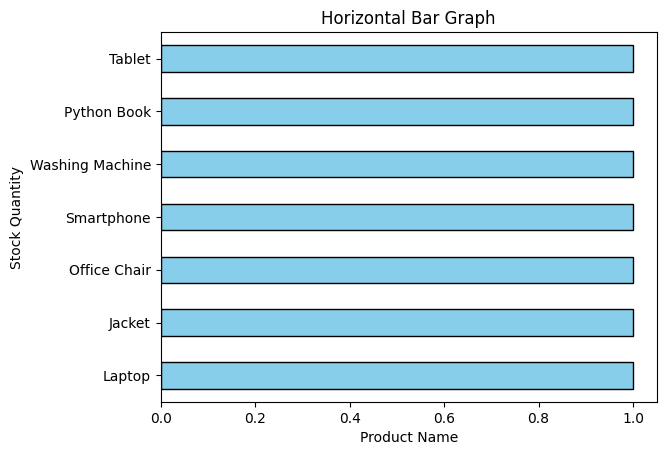

Customer with most total sales: C005
Top 3 countries with the highest average Order Value:
   Order ID Customer ID Product ID  Quantity Order Status  Order Date  \
4      1006        C005       P005       1.0    Delivered  2024-01-11   
0      1001        C001       P001       2.0    Delivered  2024-01-10   
6      1008        C007       P006       3.0      Pending  2024-03-05   

      Category     Product Name  Price Per Unit  Stock Quantity   Name  \
4   Appliances  Washing Machine             400              20    Eva   
0  Electronics           Laptop             800              50  Alice   
6        Books      Python Book              30             200  Grace   

   Country   Age   Join Date  Order Value  
4  Germany  35.0  2023-04-14       2000.0  
0      USA  30.0  2023-01-10       1600.0  
6    India  27.0  2023-07-22       1050.0  
 Highlight low-stock products:
Empty DataFrame
Columns: [Product ID, Category, Product Name, Price Per Unit, Stock Quantity]
Index: []


In [2]:
#load data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv('order data.csv')
df2=pd.read_csv('customer data.csv')
df3=pd.read_csv('product data.csv')
print("Order Data:")
print(df1)
print("Customer Data:")
print(df2)
print("Product Data:")
print(df3)
#1. Fill missing Quantity in the Orders table with the median value.
df1['Quantity'].fillna(df1['Quantity'].median(),inplace=True)
#2. Replace missing Age in the Customers table with the average age of all customers
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
print("Customer Data:\n",df2)
print("Product Data:\n",df3)
##3. Drop orders with the status Cancelled.
df1=df1[(df1['Order Status'].isin(['Delivered','Pending']))]
print("Order Data:\n",df1)
#4. Ensure no duplicate rows exist in any datase
df1=df1.drop_duplicates()
print(df1)
df2=df2.drop_duplicates()
print(df2)
df3=df3.drop_duplicates()
print(df3)
#Part 2: Data Merging and Manipulation
#1. Merge Orders and Products using Product ID
joined_data=pd.merge(df1,df3,on='Product ID',how='inner')
print("Merged Data:\n",joined_data)
#2. Merge the result with Customers using Customer ID.
joined1_data=pd.merge(joined_data,df2,on='Customer ID',how='inner')
print("Final Merged Data:\n",joined1_data)
#3. Create a new column Order Value as Quantity * Price Per Unit.
joined1_data=pd.merge(df1,df3,on='Product ID',how='inner')
joined1_data['Order Value']=df1['Quantity']*df3['Price Per Unit']
print("After Adding Order Value Column:")
print(joined1_data)
#4.1 Filter data for orders where Order Value > $500.
filtered_df=joined1_data[joined1_data['Order Value']>500]
print("Filtered Data:")
print(filtered_df)
#for 5th step
joined1_data=pd.merge(joined_data,df2,on='Customer ID',how='inner')
print("Final Merged Data:\n",joined1_data)
joined1_data['Order Value']=df1['Quantity']*df3['Price Per Unit']
print(joined1_data)
#5. Calculate total Order Value for each country
grouped=joined1_data.groupby('Country')['Order Value'].agg(['sum'])
print("Group by analysis:")
print(grouped)
#6. Identify the top 5 products with the highest total sales (Order Value).
top_products = joined1_data.groupby('Product Name')['Order Value'].sum().nlargest(5)
print("Top 5 products with the highest total sales (Order Value):")
print(top_products)
#Part 3: Data Visualization
#1. Create a bar chart showing total sales by Country.
print("Visualization:")
sns.histplot(joined1_data['Order Value'],kde=False,bins=5)#using False for no line in graph
plt.title('Sales Distribution')
plt.xlabel('Order Value')
plt.ylabel('Country')
plt.show()
#2. Use a line chart to visualize sales trends over time.
print("Line Chart:")
plt.figure(figsize=(10, 6))
sales_over_time = joined1_data.groupby('Order Date')['Order Value'].sum()
print(sales_over_time)
plt.plot(sales_over_time.index,sales_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Sales Trends Over Time')
plt.show()
#3. Generate a heatmap to analyze correlations between Quantity, Price Per Unit, and Order Value.
#Correlation Matrix
correlation=joined1_data[['Quantity','Price Per Unit','Order Value']].corr()
print("Correlation Matrix:")
print(correlation)
#Heatmap visualization
print("\n\nHeatmap:")
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='2f',linewidth=0.5)
plt.title('Correlation Heat Map')
plt.show()
#4. Create a pie chart showing the percentage contribution of each product category to total sales.
print("Pie chart:")
df3=pd.read_csv('product data.csv')
df3['Category'].value_counts().plot(kind='pie',autopct='1%.1f%%',startangle=90)
plt.title('Product Category')
plt.ylabel(' ')
plt.show()
#5. Visualize stock levels for all products using a horizontal bar chart
print("Visualization of Horizontal Bar Graph:")
df3['Product Name'].value_counts().plot(kind='barh',color='skyblue',edgecolor='black',width=0.5)
plt.title('Horizontal Bar Graph')
plt.xlabel('Product Name')
plt.ylabel('Stock Quantity')
plt.show()
#Part 4: Advanced Insights
#1. Find the customer who contributed the most to total sales
top_customer = joined1_data.groupby('Customer ID')['Order Value'].sum().idxmax()
print("Customer with most total sales:",top_customer)
#2. List the top 3 countries with the highest average Order Value
sorted_countries = joined1_data.sort_values(by='Order Value',ascending=False)
top3_countries = sorted_countries.head(3)
print("Top 3 countries with the highest average Order Value:")
print(top3_countries)
#3. Highlight low-stock products (Stock Quantity < 20) using conditional formatting.
low_stock_products=df3[df3['Stock Quantity']<20]
print(" Highlight low-stock products:")
print(low_stock_products)